In [70]:
# Import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
from shapely.geometry import Point, shape
from geopandas import GeoDataFrame
import json

In [71]:
# Load in the dataframe.
df = pd.read_csv('Basic incidents details 2022 - 4326.csv')
df.head()

/var/folders/pf/dhzh4m9j6tq7w7_1qw2v6c580000gn/T/ipykernel_9502/1902553018.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Basic incidents details 2022 - 4326.csv')


,_id,INCIDENT_NUMBER,Initial_CAD_Event_Type,Initial_CAD_Event_Call_Type,Final_Incident_Type,Event_Alarm_Level,Call_Source,Incident_Station_Area,Incident_Ward,Ward_At_Event_Dispatch,Intersection,TFS_Alarm_Time,TFS_Arrival_Time,Last_TFS_Unit_Clear_Time,Persons_Rescued,geometry
0,1,F22017150,Medical,Medical,94 - Other Public Service,0,03 - From Ambulance,225,20,20.0,M1L,2022-02-05T04:04:47,2022-02-05T04:12:32,2022-02-05T04:23:15,0.0,"{'type': 'MultiPoint', 'coordinates': [[0, 0]]}"
1,2,F22124543,Medical,Medical,Medical,0,03 - From Ambulance,244,22,22.0,M1W,2022-09-16T22:22:08,2022-09-16T22:34:38,2022-09-16T23:12:27,0.0,"{'type': 'MultiPoint', 'coordinates': [[0, 0]]}"
2,3,F22133289,FIG - Fire - Grass/Rubbish,Emergency Fire,23 - Open air burning/unauthorized controlled ...,0,07 - Verbal Report to Station (in person),133,5,5.0,Wickford Dr / Wyndale Dr,2022-10-03T21:13:54,2022-10-03T21:15:17,2022-10-03T21:18:19,0.0,"{'type': 'MultiPoint', 'coordinates': [[-79.47..."
3,4,F22093690,Medical,Medical,Medical,0,03 - From Ambulance,431,3,3.0,M8Z,2022-07-19T09:40:33,2022-07-19T09:45:00,2022-07-19T09:54:37,0.0,"{'type': 'MultiPoint', 'coordinates': [[0, 0]]}"
4,5,F22041879,Medical,Medical,94 - Other Public Service,0,03 - From Ambulance,213,25,25.0,M1B,2022-04-05T19:15:45,2022-04-05T19:21:27,2022-04-05T19:35:57,0.0,"{'type': 'MultiPoint', 'coordinates': [[0, 0]]}"


In [72]:
# Drop unnecessary columns.
df = df.drop(columns=['_id', 'Initial_CAD_Event_Type', 'Incident_Ward', 'Ward_At_Event_Dispatch'])
df.head()

,INCIDENT_NUMBER,Initial_CAD_Event_Call_Type,Final_Incident_Type,Event_Alarm_Level,Call_Source,Incident_Station_Area,Intersection,TFS_Alarm_Time,TFS_Arrival_Time,Last_TFS_Unit_Clear_Time,Persons_Rescued,geometry
0,F22017150,Medical,94 - Other Public Service,0,03 - From Ambulance,225,M1L,2022-02-05T04:04:47,2022-02-05T04:12:32,2022-02-05T04:23:15,0.0,"{'type': 'MultiPoint', 'coordinates': [[0, 0]]}"
1,F22124543,Medical,Medical,0,03 - From Ambulance,244,M1W,2022-09-16T22:22:08,2022-09-16T22:34:38,2022-09-16T23:12:27,0.0,"{'type': 'MultiPoint', 'coordinates': [[0, 0]]}"
2,F22133289,Emergency Fire,23 - Open air burning/unauthorized controlled ...,0,07 - Verbal Report to Station (in person),133,Wickford Dr / Wyndale Dr,2022-10-03T21:13:54,2022-10-03T21:15:17,2022-10-03T21:18:19,0.0,"{'type': 'MultiPoint', 'coordinates': [[-79.47..."
3,F22093690,Medical,Medical,0,03 - From Ambulance,431,M8Z,2022-07-19T09:40:33,2022-07-19T09:45:00,2022-07-19T09:54:37,0.0,"{'type': 'MultiPoint', 'coordinates': [[0, 0]]}"
4,F22041879,Medical,94 - Other Public Service,0,03 - From Ambulance,213,M1B,2022-04-05T19:15:45,2022-04-05T19:21:27,2022-04-05T19:35:57,0.0,"{'type': 'MultiPoint', 'coordinates': [[0, 0]]}"


In [73]:
# We are only interested in the incidents where Event_Alarm_Level is 1 or greater.
df = df[df['Event_Alarm_Level'] >= 1]
df.head()

,INCIDENT_NUMBER,Initial_CAD_Event_Call_Type,Final_Incident_Type,Event_Alarm_Level,Call_Source,Incident_Station_Area,Intersection,TFS_Alarm_Time,TFS_Arrival_Time,Last_TFS_Unit_Clear_Time,Persons_Rescued,geometry
175,F22043070,Emergency Fire,01 - Fire,1,05 - Telephone from Monitoring Agency,421,Scarlett Rd / East Dr,2022-04-08T14:16:36,2022-04-08T14:22:06,2022-04-08T15:02:04,0.0,"{'type': 'MultiPoint', 'coordinates': [[-79.50..."
417,F22005469,Emergency Fire,01 - Fire,1,01 - 911,344,Bloor St W / Grace St / Christie St,2022-01-12T18:57:12,2022-01-12T19:01:08,2022-01-13T10:31:15,0.0,"{'type': 'MultiPoint', 'coordinates': [[-79.41..."
620,F22090890,Emergency Fire,01 - Fire,2,01 - 911,232,Tansley Ave / Paloma Pl,2022-07-14T05:53:23,2022-07-14T05:57:57,2022-07-14T11:18:16,0.0,"{'type': 'MultiPoint', 'coordinates': [[-79.24..."
1280,F22155958,Emergency Fire,01 - Fire,2,01 - 911,244,Earlton Rd / Jade St,2022-11-18T02:51:21,2022-11-18T02:55:47,2022-11-18T03:53:00,0.0,"{'type': 'MultiPoint', 'coordinates': [[-79.28..."
1349,F22169389,Emergency Fire,01 - Fire,2,01 - 911,132,Weetwood St / Old Orchard Grv,2022-12-14T11:31:54,2022-12-14T11:37:53,2022-12-14T12:59:55,0.0,"{'type': 'MultiPoint', 'coordinates': [[-79.42..."


In [74]:
# Check for missing values in the dataframe.
na_report = df.isna().sum()
print(na_report)

INCIDENT_NUMBER                0
Initial_CAD_Event_Call_Type    0
Final_Incident_Type            0
Event_Alarm_Level              0
Call_Source                    0
Incident_Station_Area          0
Intersection                   0
TFS_Alarm_Time                 0
TFS_Arrival_Time               0
Last_TFS_Unit_Clear_Time       0
Persons_Rescued                0
geometry                       0
dtype: int64


In [75]:
# Great! No additional data cleaning needs to occur.

In [76]:
# Load the run area file.
run_areas = gpd.read_file('FIRE_RUN_AREA_WGS84.geojson')

In [77]:
# Uncover what kind of coordinate format 'geometry' is in.
for entry in df['geometry'].head(5):
    print(entry)

{'type': 'MultiPoint', 'coordinates': [[-79.506, 43.6768]]}
{'type': 'MultiPoint', 'coordinates': [[-79.4189, 43.6635]]}
{'type': 'MultiPoint', 'coordinates': [[-79.2458, 43.7463]]}
{'type': 'MultiPoint', 'coordinates': [[-79.2886, 43.7814]]}
{'type': 'MultiPoint', 'coordinates': [[-79.4211, 43.7314]]}


In [78]:
# Manually parse the string as per the format above.
# Return nothing if parsing fails.
def extract_first_point(geom_string):
    try:
        coord_start = geom_string.find('[[') + 2
        coord_end = geom_string.find(']]')
        coords = geom_string[coord_start:coord_end].split(',')
        return float(coords[0]), float(coords[1])
    except ValueError:
        return None, None  

# Apply the function to extract coordinates.
df['longitude'], df['latitude'] = zip(*df['geometry'].apply(extract_first_point))

In [79]:
# Verify longitude and latitude in df.
df[['longitude', 'latitude']].head()

,longitude,latitude
175,-79.5060,43.6768
417,-79.4189,43.6635
620,-79.2458,43.7463
1280,-79.2886,43.7814
1349,-79.4211,43.7314


In [80]:
# Create a GeoDataFrame from the original df with WGS 84 coordinate reference system (EPSG:4326) for global latitude and longitude representation.
gdf_incidents = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")

In [81]:
# Perform a spatial join to find incidents within run areas, retaining all incidents and matching them with run area polygons.
joined = gpd.sjoin(gdf_incidents, run_areas, how='left', op='within')

/opt/miniconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [82]:
# Count the number of incidents within each run area and assign the counts back to the run areas, setting absent values to zero.
incident_counts = joined.groupby('index_right').size()
run_areas['incident_count'] = run_areas.index.map(incident_counts).fillna(0)

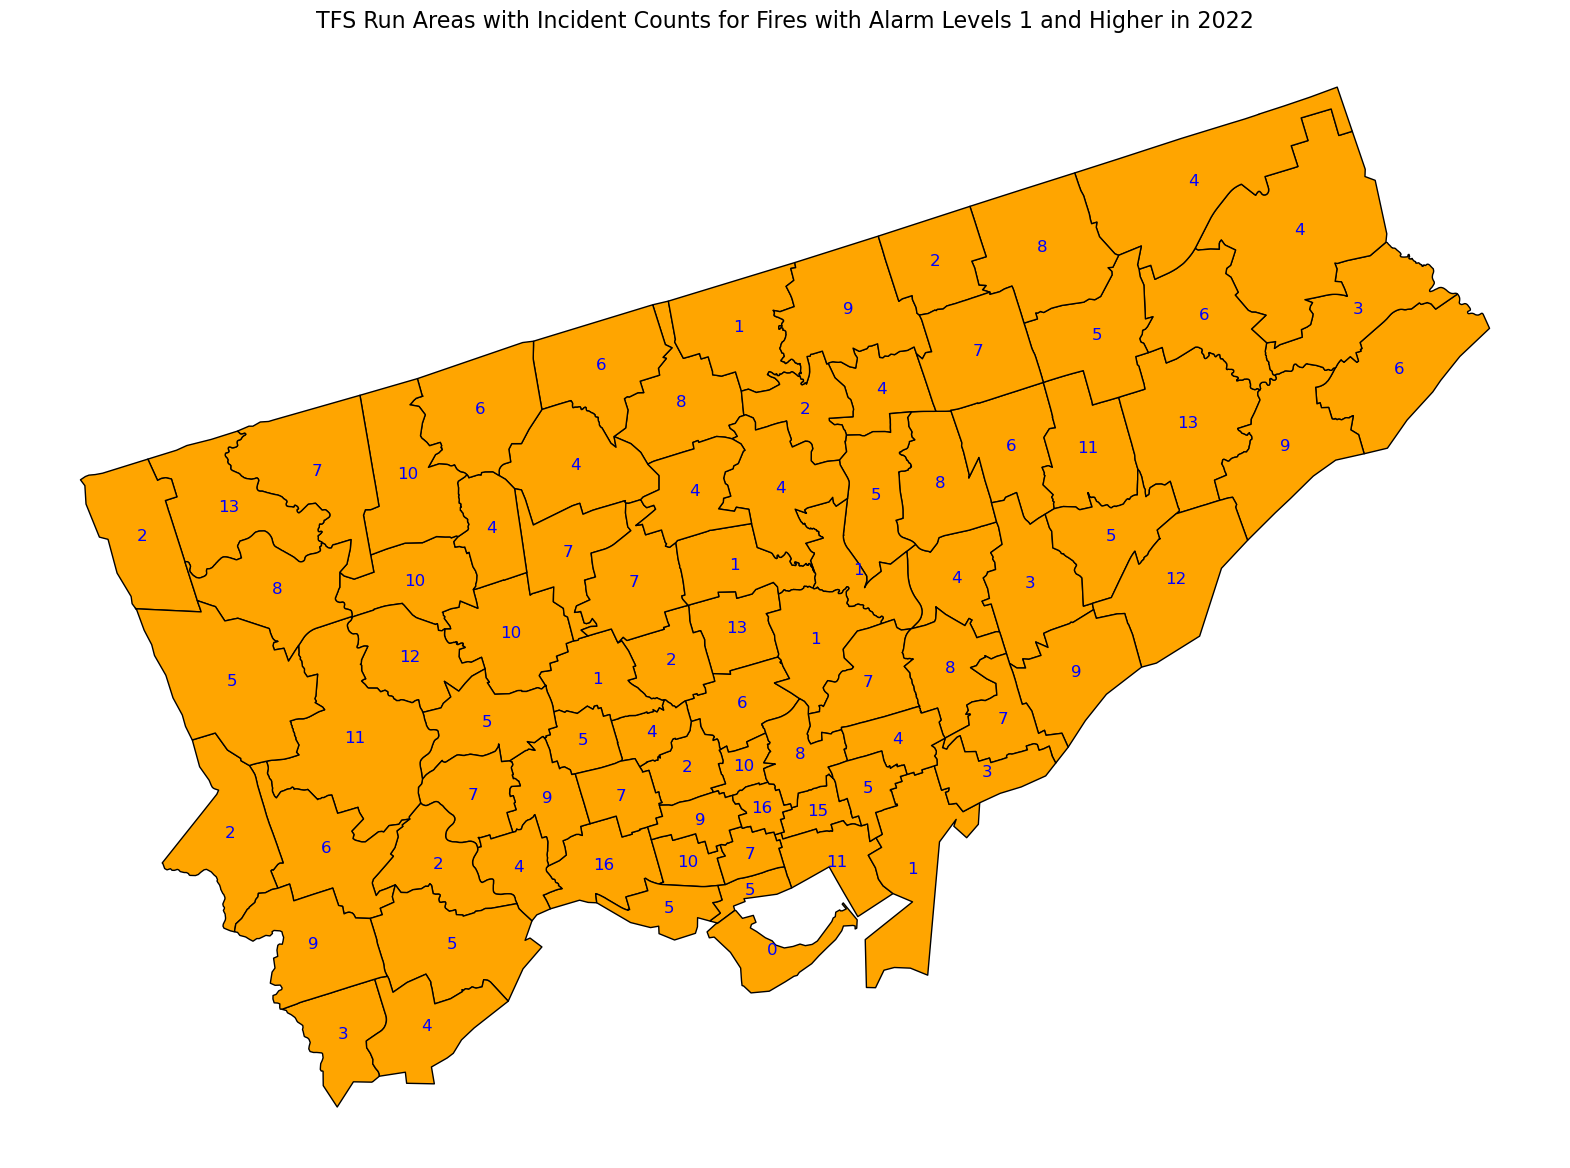

In [83]:
# Initialize a large 20x20 figure for plotting the map of Toronto's fire run areas.
fig, ax = plt.subplots(figsize=(20, 20))
run_areas.plot(ax=ax, color='orange', edgecolor='black')

# Iterate over each run area, annotating with the count of incidents at the polygon's centroid, using blue text.
for idx, row in run_areas.iterrows():
    centroid = row.geometry.centroid
    ax.annotate(text=str(int(row['incident_count'])), xy=(centroid.x, centroid.y), 
                ha='center', va='center', color='blue', fontsize=12) 

# Set title, turn off x and y axes, and display the plot.
ax.set_title('TFS Run Areas with Incident Counts for Fires with Alarm Levels 1 and Higher in 2022', fontsize=16)
plt.axis('off')
plt.show()